Import some prerequisites

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [3]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.

    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.

    Returns:
        (tuple): tuple of two point of line.
    '''

    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# part b


Implement this function to detect and remove circles in the given image.

In [4]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    #Writer your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # gray = cv2.medianBlur(gray, 5)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 0.85, 40,
                               param1 = 60, param2 = 40, minRadius = 10, maxRadius = 110)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(out_img, (i[0], i[1]), i[2] + 5, (0, 0, 0), -1)
    return out_img

Test your implementation (dont change this cell)

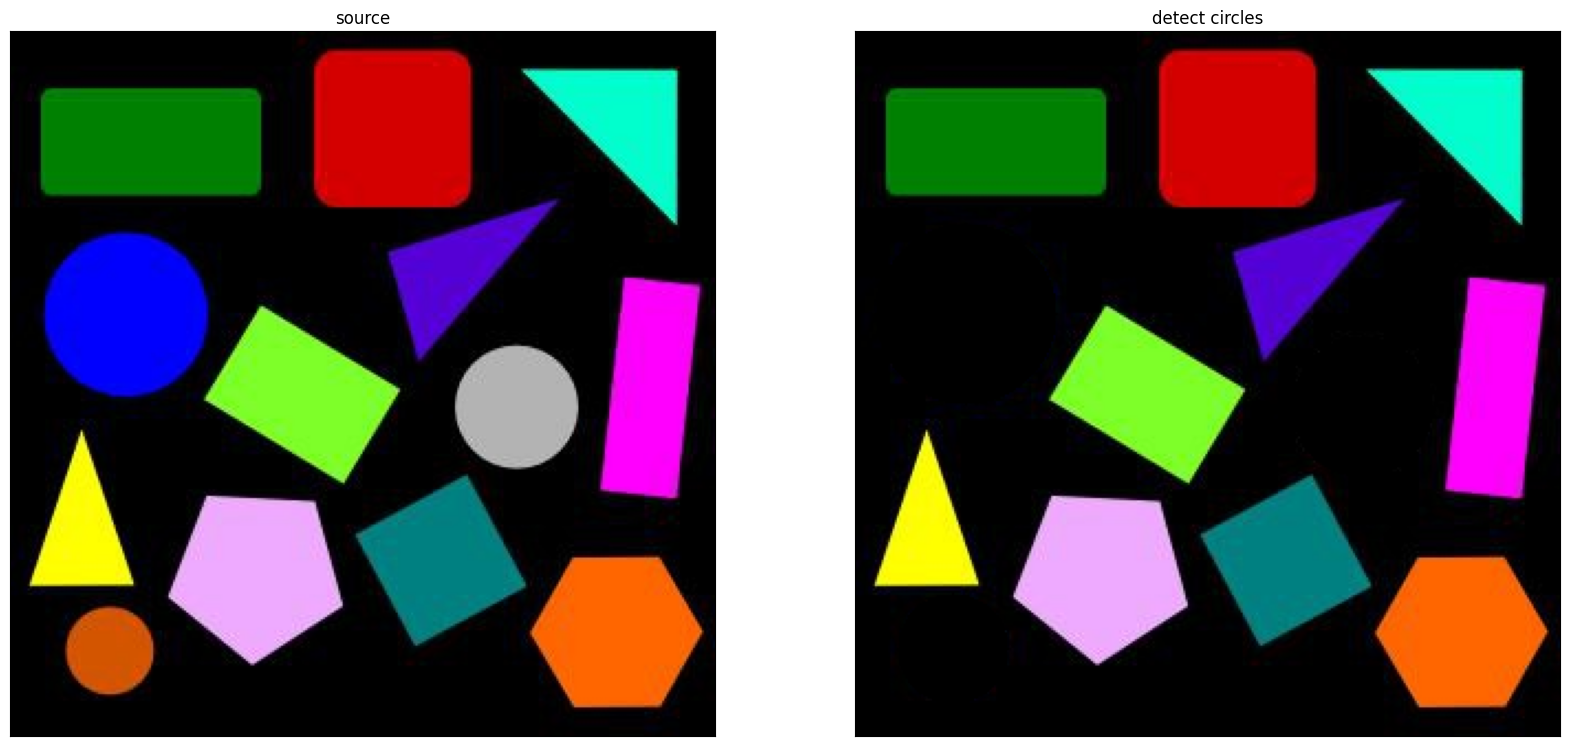

In [5]:
image_list = []

# image = cv2.imread(os.path.join('images', '1.png'))
image = cv2.imread('1.jpg')
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# part c

Implement this function to detect lines in the given image with hough algorithm.

In [6]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    #Writer your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Apply Gaussian blur to help reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/(360*180) , threshold=20, minLineLength=10, maxLineGap=10)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)

    return out_img

dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)

lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines

rho : The resolution of the parameter r in pixels. We use 1 pixel.

theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)

threshold: The minimum number of intersections to "*detect*" a line

minLineLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.

maxLineGap: The maximum gap between two points to be considered in the same line.

Test your implementation (dont change this cell)

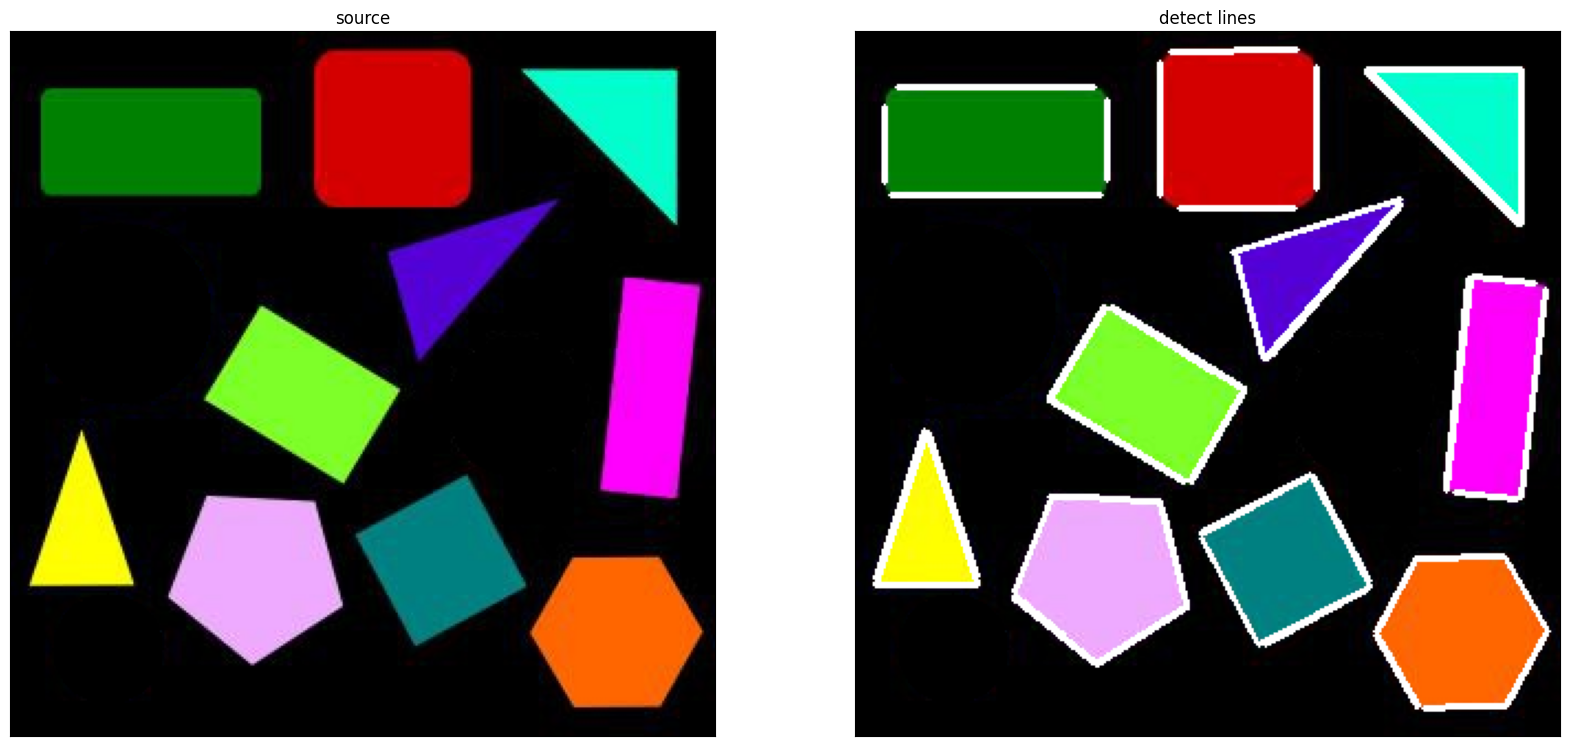

In [7]:
image_list = []

# image = cv2.imread(os.path.join('images', '1b.png'))
# image = cv2.imread('q4a.png')
image = out_img.copy()
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# part d

In [8]:
import cv2
import numpy as np

def detect_roundish_shapes(image):
    '''
    Detects roundish rectangles and squares in an image.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The image with detected shapes outlined.
    '''
    out_img = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)

    # Using Hough Circle Transform to detect circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(out_img, (i[0], i[1]), i[2], (255, 255, 0), 2)  # Draw circles in yellowl

    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    edge_img = np.zeros_like(image)
    cv2.drawContours(edge_img, contours, -1, (0,125, 125), 3)  # Drawing all contours in green with a thickness of 3
    for cnt in contours:
        epsilon = 0.02 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        if len(approx) == 3:
            cv2.drawContours(out_img, [approx], 0, (255, 0, 0), 2)  # Draw triangles in blue
            print("blue shapes are triangle.")
        elif len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            aspectRatio = float(w) / h
            if 0.8 <= aspectRatio <= 1.2:  # More square-like
                cv2.drawContours(out_img, [approx], 0, (0, 255, 0), 2)
                print("green shapes are square.")
            else:  # More rectangle-like
                cv2.drawContours(out_img, [approx], 0, (0, 0, 255), 2)
                print("red shapes are rectangle.")
        elif len(approx) > 8:
            area = cv2.contourArea(cnt)
            perimeter = cv2.arcLength(cnt, True)
            circularity = 4 * np.pi * (area / (perimeter * perimeter))
            if circularity > 0.7:  # Lower the threshold to catch more imperfect circles
                cv2.drawContours(out_img, [approx], 0, (255, 255, 0), 2)  # Draw circles in yellow'
            print('Pale blue shapes are circles.')
        for vertex in approx:
            x, y = vertex.ravel()
            cv2.circle(out_img, (x, y), 5, (10, 134, 100), -1)  # Vertex in red
    return out_img


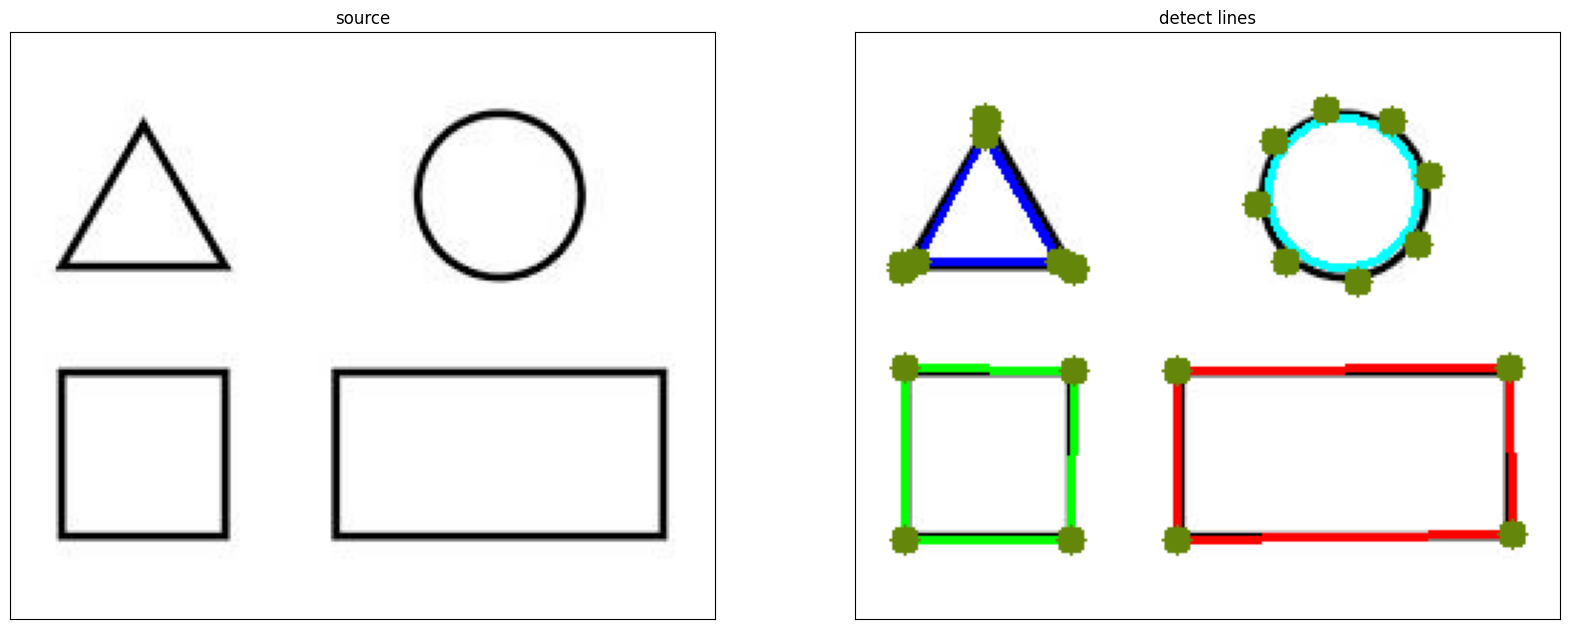

In [9]:
image_list = []

# image = cv2.imread(os.path.join('images', '1b.png'))
image = cv2.imread('7.jpg')
# image = out_img.copy()
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_roundish_shapes(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4c')